# Exploratory Data Analysis with Simple ML Models
This notebook demonstrates how simple machine learning models can be used as *exploratory tools* to assess data structure and quality.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## 1. Load and Inspect the Data

In [11]:
iris = load_iris(as_frame=True)
df = iris.frame
df.drop(columns='target', inplace=True) 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


KeyError: 'target'

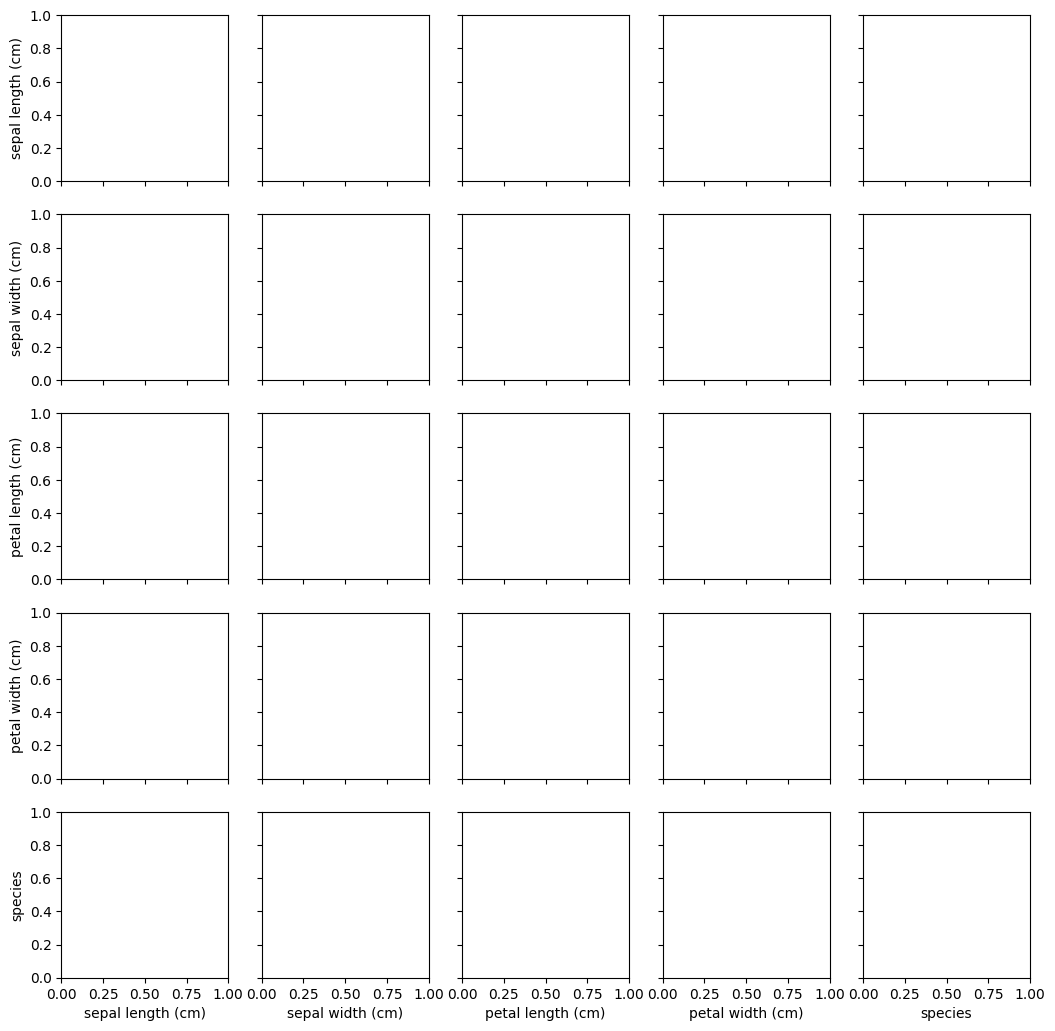

In [10]:
sns.pairplot(df, hue='target', diag_kind='kde')
plt.suptitle("Pairwise relationships in the Iris dataset", y=1.02)
plt.show()

## 2. Recap Dimensionality Reduction (PCA)

In [ ]:
X = df[iris.feature_names]
y = df['target']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1')
plt.title("PCA projection of the Iris dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
print(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")

## 3. Using Simple ML Models as EDA Tools

Pseudorandom split the data in training data and test data for evaluating the prediction. The stratify parameter ensures that the targets are evenly represented in the split data sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

### a) Logistic Regression

Is a regression model suitable for a classification problem?

In [ ]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

print("Train accuracy:", logreg.score(X_train, y_train))
print("Test accuracy:", logreg.score(X_test, y_test))

In [ ]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

### b) Decision Tree Classifier

In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

print("Train accuracy:", tree.score(X_train, y_train))
print("Test accuracy:", tree.score(X_test, y_test))

ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test)
plt.title("Confusion Matrix – Decision Tree")
plt.show()

In [ ]:
feat_importances = pd.Series(tree.feature_importances_, index=iris.feature_names)
feat_importances.sort_values().plot(kind='barh')
plt.title("Feature Importances (Decision Tree)")
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(
    tree,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for the Iris Dataset (max_depth=3)")
plt.show()

## 4. Quick Model Diagnostics

Testing generalisation by cross validation

In [ ]:
cv_scores = cross_val_score(tree, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

In [ ]:
X_pca_full = PCA(n_components=2).fit_transform(X)
tree.fit(X_pca_full, y)
print("Decision Tree accuracy on 2D PCA features:", cross_val_score(tree, X_pca_full, y, cv=5).mean())

## 5. Wrap-Up & Reflection

In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

In [ ]:
summary = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree (depth=3)"],
    "Train Accuracy": [logreg.score(X_train, y_train), tree.score(X_train, y_train)],
    "Test Accuracy": [logreg.score(X_test, y_test), tree.score(X_test, y_test)]
})
summary

What can we take away from this?